# <center>Analysis in PlantVillage Dataset

Here we have we tried various models like: VGG16, Xception, Inception, ResNet, MoblieNet for prediction and detection of plant diseases using PlantVillage dataset.

**IMPORTING THE DATASET**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('plant_village', split='train', shuffle_files=True, data_dir = '/content/Dataset')


Shuffling and writing examples to /content/Dataset/plant_village/1.0.2.incompleteKM9IPT/plant_village-train.tfrecord


Dataset plant_village downloaded and prepared to /content/Dataset/plant_village/1.0.2. Subsequent calls will reuse this data.


In [ ]:
pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install split-folders tqdm

In [ ]:
import splitfolders  # or import split_folders

splitfolders.ratio("/content/Dataset/downloads/extracted/ZIP.data.mend.com_publ-file_data_tywb_file_d565-c1Wn0ZubrKHlSvz-Szcdvi60AcmG4VmhGPgtyGmqp7FDg/Plant_leave_diseases_dataset_without_augmentation", output="/content/Plant", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 55448 files [00:08, 6418.53 files/s]


**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot

#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
#import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**SPLITTING DATA INTO TRAINING AND VALIDATION**

In [ ]:
traindir = "/content/Plant/train"
validdir = "/content/Plant/val"

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

batch_size = 128
training_set = train_datagen.flow_from_directory(traindir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(validdir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical')

Found 44343 images belonging to 39 classes.
Found 11105 images belonging to 39 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___Septo

In [ ]:
cls_dict = valid_set.class_indices
print(cls_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Background_without_leaves': 4, 'Blueberry___healthy': 5, 'Cherry___Powdery_mildew': 6, 'Cherry___healthy': 7, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 8, 'Corn___Common_rust': 9, 'Corn___Northern_Leaf_Blight': 10, 'Corn___healthy': 11, 'Grape___Black_rot': 12, 'Grape___Esca_(Black_Measles)': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Grape___healthy': 15, 'Orange___Haunglongbing_(Citrus_greening)': 16, 'Peach___Bacterial_spot': 17, 'Peach___healthy': 18, 'Pepper,_bell___Bacterial_spot': 19, 'Pepper,_bell___healthy': 20, 'Potato___Early_blight': 21, 'Potato___Late_blight': 22, 'Potato___healthy': 23, 'Raspberry___healthy': 24, 'Soybean___healthy': 25, 'Squash___Powdery_mildew': 26, 'Strawberry___Leaf_scorch': 27, 'Strawberry___healthy': 28, 'Tomato___Bacterial_spot': 29, 'Tomato___Early_blight': 30, 'Tomato___Late_blight': 31, 'Tomato___Leaf_Mold': 32, 'Tomato___Septo

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Background_without_leaves', 'Blueberry___healthy', 'Cherry___Powdery_mildew', 'Cherry___healthy', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl

In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

# CNN Model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(39, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      training_set,
      steps_per_epoch=train_num//batch_size,  # 2000 images = batch_size * steps
      epochs=3,
      validation_data=valid_set,
      validation_steps=valid_num//batch_size) # 1000 images = batch_size * steps

Epoch 1/3
346/346 [==============================] - 511s 1s/step - loss: 0.0845 - accuracy: 0.3650 - val_loss: 0.0619 - val_accuracy: 0.5449
Epoch 2/3
346/346 [==============================] - 509s 1s/step - loss: 0.0588 - accuracy: 0.5699 - val_loss: 0.0688 - val_accuracy: 0.4977
Epoch 3/3
346/346 [==============================] - 498s 1s/step - loss: 0.0476 - accuracy: 0.6639 - val_loss: 0.0456 - val_accuracy: 0.6781


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# VGG16 Model

**INITIALIZING THE BASE MODEL: VGG16**

In [ ]:
base_model=VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 39)                978471    
Total params: 15,693,159
Trainable params: 978,471
Non-trainable params: 14,714,688
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
  5/346 [..............................] - ETA: 8:49 - loss: 1.0397 - accuracy: 0.8703

KeyboardInterrupt: ignored

In [ ]:
#Saving our model
filepath="Mymodel.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)


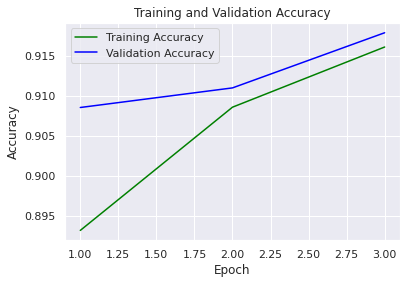

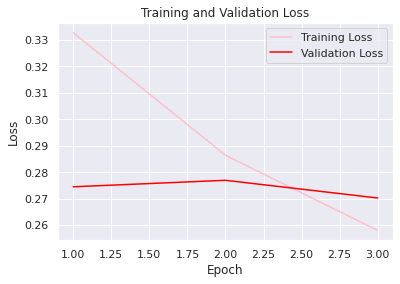

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Xception Model



**INITIALIZING THE BASE MODEL: Xception**

In [ ]:
from keras.applications import Xception

In [ ]:
base_model=Xception(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

83689472/83683744 [==============================] - 1s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 39)                3913767   
Total params: 24,775,247
Trainable params: 3,913,767
Non-trainable params: 20,861,480
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=1, validation_steps=valid_num//batch_size)



346/346 [==============================] - 584s 2s/step - loss: 1.3121 - accuracy: 0.8232 - val_loss: 1.0406 - val_accuracy: 0.8669


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

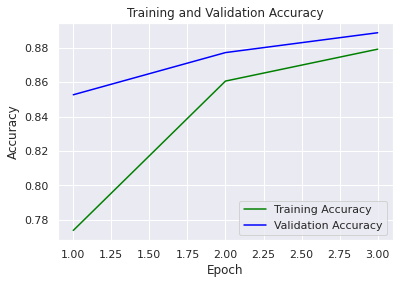

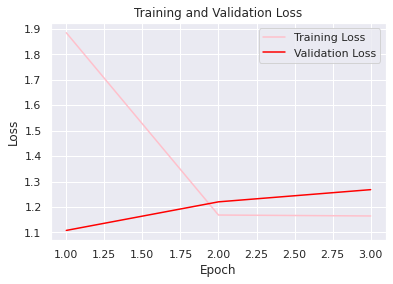

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# InceptionV3 Model

**INITIALIZING THE BASE MODEL: InceptionV3**

In [ ]:
from keras.applications import InceptionV3

In [ ]:
base_model=InceptionV3(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

87916544/87910968 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 39)                1996839   
Total params: 23,799,623
Trainable params: 1,996,839
Non-trainable params: 21,802,784
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 503s 1s/step - loss: 2.9268 - accuracy: 0.7390 - val_loss: 1.4422 - val_accuracy: 0.8249
Epoch 2/3
346/346 [==============================] - 506s 1s/step - loss: 1.4313 - accuracy: 0.8338 - val_loss: 1.2199 - val_accuracy: 0.8698
Epoch 3/3
346/346 [==============================] - 507s 1s/step - loss: 1.5036 - accuracy: 0.8553 - val_loss: 1.3818 - val_accuracy: 0.8749


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

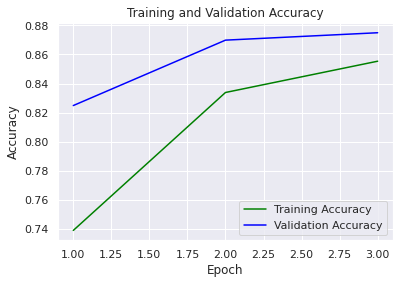

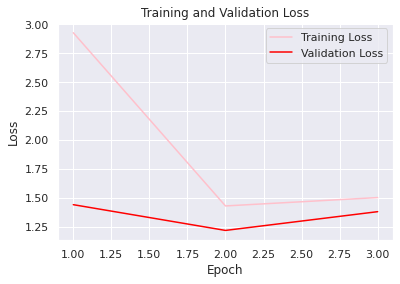

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ResNet152 Model

**INITIALIZING THE BASE MODEL: ResNet152**

In [ ]:
from keras.applications import ResNet152

In [ ]:
base_model=ResNet152(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

234700800/234698864 [==============================] - 4s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 7, 7, 2048)        58370944  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 39)                3913767   
Total params: 62,284,711
Trainable params: 3,913,767
Non-trainable params: 58,370,944
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 571s 2s/step - loss: 4.0544 - accuracy: 0.2379 - val_loss: 2.4718 - val_accuracy: 0.3916
Epoch 2/3
346/346 [==============================] - 575s 2s/step - loss: 2.7233 - accuracy: 0.3258 - val_loss: 2.4766 - val_accuracy: 0.3805
Epoch 3/3
346/346 [==============================] - 585s 2s/step - loss: 2.6487 - accuracy: 0.3654 - val_loss: 2.6794 - val_accuracy: 0.4221


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

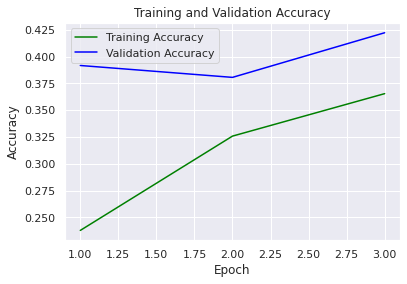

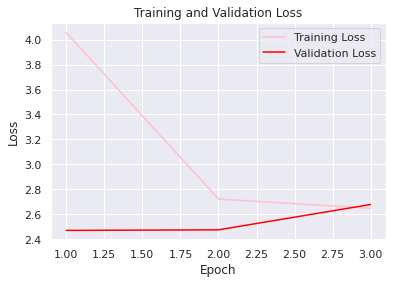

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# MoblieNetV2 Model

**INITIALIZING THE BASE MODEL: MobileNetV2**

In [ ]:
from keras.applications import MobileNetV2

In [ ]:
base_model=MobileNetV2(include_top=False, weights="imagenet", input_shape=(224,224,3))
base_model.trainable=False

9412608/9406464 [==============================] - 0s 0us/step


**ADDING FURTHER LAYERS**

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(39,activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 62720)             0         
_________________________________________________________________
dense (Dense)                (None, 39)                2446119   
Total params: 4,704,103
Trainable params: 2,446,119
Non-trainable params: 2,257,984
_________________________________________________________________


**TRAINING THE MODEL**

In [ ]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#fitting images to CNN
history = classifier.fit(training_set, steps_per_epoch=train_num//batch_size, validation_data=valid_set, epochs=3, validation_steps=valid_num//batch_size)

Epoch 1/3
346/346 [==============================] - 522s 2s/step - loss: 2.1738 - accuracy: 0.8239 - val_loss: 1.1626 - val_accuracy: 0.8947
Epoch 2/3
346/346 [==============================] - 514s 1s/step - loss: 1.3340 - accuracy: 0.8984 - val_loss: 1.2385 - val_accuracy: 0.9092
Epoch 3/3
346/346 [==============================] - 506s 1s/step - loss: 1.2360 - accuracy: 0.9186 - val_loss: 1.1849 - val_accuracy: 0.9221


In [ ]:
#Saving our model
filepath="Mymodel2.h5"
classifier.save(filepath)

**VISUALIZING THE RESULTS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

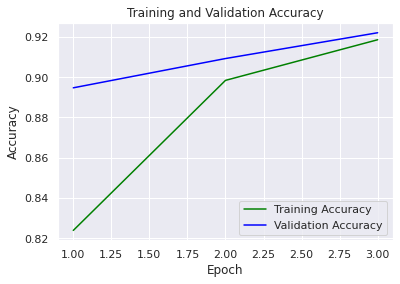

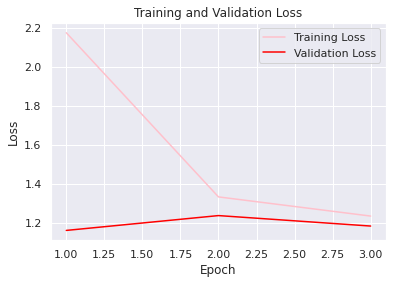

In [ ]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()